In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
nba_data = pd.read_csv('NBA_shoots.csv')
df = pd.DataFrame(nba_data)
nba_data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


In [30]:
df.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

In [48]:
# Agrupamos por PLAYER_ID y contamos cuántos nombres distintos tiene cada uno
conteo_nombres_por_id = df.groupby('PLAYER_ID')['PLAYER_NAME'].nunique()


# Filtramos los IDs que tienen más de 1 nombre distinto
ids_con_error = conteo_nombres_por_id[conteo_nombres_por_id > 1]

# Mostramos los IDs problemáticos
print(ids_con_error)

# Agrupamos por PLAYER_ID y obtenemos los nombres únicos
nombres_por_id = df.groupby('PLAYER_ID')['PLAYER_NAME'].unique()

# Filtramos solo los IDs que tienen más de un nombre asignado
ids_con_varios_nombres = nombres_por_id[nombres_por_id.apply(lambda x: len(x) > 1)]

# Mostramos los resultados
for player_id, nombres in ids_con_varios_nombres.items():
    print(f"PLAYER_ID {player_id} tiene los nombres: {nombres}")



Series([], Name: PLAYER_NAME, dtype: int64)


In [58]:
#Para reemplazar los nombres incorrectos
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Reggie Bullock$', 'Reggie Bullock Jr.', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^OG Anunoby$', 'O.G. Anunoby', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^PJ Dozier$', 'P.J. Dozier', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Alekesej Pokusevski$', 'Aleksej Pokusevski', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^KJ Martin$', 'Kenyon Martin Jr.', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Jeff Dowtin$', 'Jeff Dowtin Jr.', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Xavier Tillman Sr.$', 'Xavier Tillman', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Brandon Boston Jr.$', 'Brandon Boston', regex=True)
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.replace(r'^Nate Williams$', 'Jeenathan Williams', regex=True)


In [59]:
df['TEAM_NAME'] = df['TEAM_NAME'].str.replace(r'^LA Clippers$', 'Los Angeles Clippers', regex=True)
df[df['TEAM_NAME']== 'Los Angeles Clippers'] 

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
123246,2024,2023-24,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,11-10-2023,22300014,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,-0.40,11.950,6,1,11,23
123247,2024,2023-24,1610612746,Los Angeles Clippers,201935,James Harden,G,PG,11-10-2023,22300014,...,Above the Break 3,Right Side Center,RC,24+ ft.,-22.40,16.150,24,1,10,43
123248,2024,2023-24,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,11-10-2023,22300014,...,Mid-Range,Left Side,L,8-16 ft.,9.20,6.950,9,1,10,22
123249,2024,2023-24,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,11-10-2023,22300014,...,Right Corner 3,Right Side,R,24+ ft.,-23.70,4.350,23,1,9,21
123250,2024,2023-24,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,11-10-2023,22300014,...,In The Paint (Non-RA),Right Side,R,8-16 ft.,-6.60,10.750,8,1,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031722,2020,2019-20,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,10-22-2019,21900002,...,Mid-Range,Left Side,L,8-16 ft.,-0.89,5.885,8,1,9,9
1031729,2020,2019-20,1610612746,Los Angeles Clippers,1627826,Ivica Zubac,C,C,10-22-2019,21900002,...,Restricted Area,Center,C,Less Than 8 ft.,-0.00,5.715,0,1,10,24
1031730,2020,2019-20,1610612746,Los Angeles Clippers,202695,Kawhi Leonard,F,SF,10-22-2019,21900002,...,Mid-Range,Right Side,R,8-16 ft.,1.10,6.675,14,1,10,29
1031734,2020,2019-20,1610612746,Los Angeles Clippers,201976,Patrick Beverley,G,PG,10-22-2019,21900002,...,Above the Break 3,Right Side Center,RC,24+ ft.,1.17,8.165,26,1,11,0


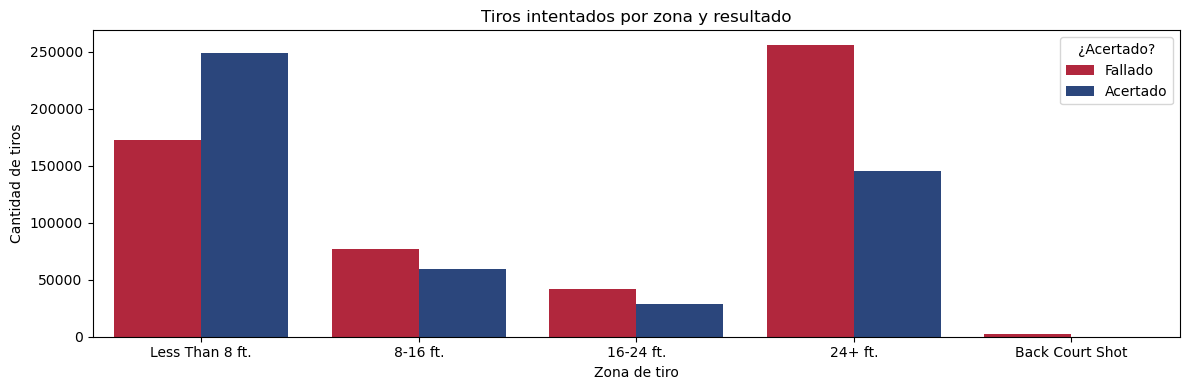

In [60]:
orden_deseado = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']
colores = {0: '#C8102E', 1: '#1D428A'}

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='ZONE_RANGE', hue='SHOT_MADE', order=orden_deseado, palette=colores)
plt.title('Tiros intentados por zona y resultado')
plt.xlabel('Zona de tiro')
plt.ylabel('Cantidad de tiros')
plt.legend(title='¿Acertado?', labels=['Fallado', 'Acertado'])
plt.tight_layout()
plt.show()




In [71]:
duplicados = df[df.duplicated()]
print(duplicados)


        SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
8032     2023-24  1610612762               Utah Jazz    1628374   
8151     2023-24  1610612762               Utah Jazz    1628374   
8535     2023-24  1610612762               Utah Jazz    1631117   
26527    2023-24  1610612759       San Antonio Spurs    1641705   
32912    2023-24  1610612758        Sacramento Kings    1626168   
53310    2023-24  1610612755      Philadelphia 76ers    1628964   
83014    2023-24  1610612740    New Orleans Pelicans     202685   
83353    2023-24  1610612740    New Orleans Pelicans     202685   
108984   2023-24  1610612763       Memphis Grizzlies     202687   
127216   2023-24  1610612746    Los Angeles Clippers     202695   
161816   2023-24  1610612743          Denver Nuggets     203999   
187863   2023-24  1610612741           Chicago Bulls     203083   
192245   2023-24  1610612766       Charlotte Hornets    1641706   
212832   2023-24  1610612737           Atlanta Hawks     20399

In [88]:
df.duplicated().sum()

0

In [87]:
df[df.duplicated(keep=False)]


,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,...,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT


In [86]:
df = df.drop_duplicates()
df


,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,...,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,...,2PT Field Goal,In The Paint (Non-RA),Center,8-16 ft.,-0.40,17.450,12,1,11,1
1,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,MIA,...,3PT Field Goal,Above the Break 3,Center,24+ ft.,1.50,30.550,25,1,10,26
2,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,...,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,-3.30,6.550,3,1,9,46
3,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,...,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,-1.00,5.850,1,1,8,30
4,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,...,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,-0.00,6.250,1,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031737,2019-20,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF,10-22-2019,21900001,TOR,...,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,0.15,6.055,3,1,11,29
1031738,2019-20,1610612740,New Orleans Pelicans,202324,Derrick Favors,C,C,10-22-2019,21900001,TOR,...,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,-0.00,5.715,0,1,11,47
1031739,2019-20,1610612746,Los Angeles Clippers,1629013,Landry Shamet,G,SG,10-22-2019,21900002,LAC,...,3PT Field Goal,Above the Break 3,Right Side Center,24+ ft.,2.01,7.555,26,1,11,40
1031740,2019-20,1610612740,New Orleans Pelicans,1628366,Lonzo Ball,G,PG,10-22-2019,21900001,TOR,...,2PT Field Goal,In The Paint (Non-RA),Center,8-16 ft.,0.02,6.915,11,1,11,48


In [84]:
df.isnull().sum()



SEASON_2          0
TEAM_ID           0
TEAM_NAME         0
PLAYER_ID         0
PLAYER_NAME       0
POSITION_GROUP    0
POSITION          0
GAME_DATE         0
GAME_ID           0
HOME_TEAM         0
AWAY_TEAM         0
SHOT_MADE         0
ACTION_TYPE       0
SHOT_TYPE         0
BASIC_ZONE        0
ZONE_NAME         0
ZONE_RANGE        0
LOC_X             0
LOC_Y             0
SHOT_DISTANCE     0
QUARTER           0
MINS_LEFT         0
SECS_LEFT         0
dtype: int64

In [89]:
df.isnull().sum().sum()


0

In [83]:
jugadores_con_nulos = df[df.isnull().any(axis=1)]['PLAYER_NAME'].unique()
print(jugadores_con_nulos)


[]


In [77]:
df[df.isnull().any(axis=1)][['PLAYER_NAME']]


,PLAYER_NAME
56836,Jeff Dowtin Jr.
56839,Jeff Dowtin Jr.
56857,Jeff Dowtin Jr.
56861,Jeff Dowtin Jr.
56864,Jeff Dowtin Jr.
...,...
1031647,O.G. Anunoby
1031700,O.G. Anunoby
1031719,O.G. Anunoby
1031725,O.G. Anunoby


In [82]:
reemplazos = {
    'Jeff Dowtin Jr.': {'POSITION': 'PG', 'POSITION_GROUP': 'G'},
    'Charlie Brown Jr.': {'POSITION': 'SG', 'POSITION_GROUP': 'G'},
    'AJ Green': {'POSITION': 'SG', 'POSITION_GROUP': 'G'},
    'Xavier Tillman': {'POSITION': 'PF-C', 'POSITION_GROUP': 'F-C'},
    'GG Jackson': {'POSITION': 'PF', 'POSITION_GROUP': 'F'},
    'Matt Hurt': {'POSITION': 'PF', 'POSITION_GROUP': 'F'},
    'Reggie Bullock Jr.': {'POSITION': 'SF', 'POSITION_GROUP': 'F'},
    'Jeenathan Williams': {'POSITION': 'SG-SF', 'POSITION_GROUP': 'G-F'},
    'Jermaine Samuels Jr.': {'POSITION': 'SF', 'POSITION_GROUP': 'F'},
    'O.G. Anunoby': {'POSITION': 'SF', 'POSITION_GROUP': 'F'},
    'John Butler Jr.': {'POSITION': 'PF', 'POSITION_GROUP': 'F'},
    'Chance Comanche': {'POSITION': 'C', 'POSITION_GROUP': 'C'},
    'M.J. Walker': {'POSITION': 'SG', 'POSITION_GROUP': 'G'},
    'Trevon Scott': {'POSITION': 'PF', 'POSITION_GROUP': 'F'},
    'P.J. Dozier': {'POSITION': 'SG', 'POSITION_GROUP': 'G'},
    'Cam Reynolds': {'POSITION': 'SF', 'POSITION_GROUP': 'F'},
    'T.J. Leaf': {'POSITION': 'PF', 'POSITION_GROUP': 'F'},
    'Michael Frazier II': {'POSITION': 'SG', 'POSITION_GROUP': 'G'},
}


for jugador, datos in reemplazos.items():
    for columna, valor in datos.items():
        df.loc[(df['PLAYER_NAME'] == jugador) & (df[columna].isna()), columna] = valor


In [91]:
# Crear una nueva columna con el tiempo total restante en segundos
df.loc[:, 'TIME_LEFT_SECONDS'] = df['MINS_LEFT'] * 60 + df['SECS_LEFT']



In [95]:
print(df['TIME_LEFT_SECONDS'])


0          661
1          626
2          586
3          510
4          488
          ... 
1031737    689
1031738    707
1031739    700
1031740    708
1031741    707
Name: TIME_LEFT_SECONDS, Length: 1031683, dtype: int64


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031683 entries, 0 to 1031741
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   SEASON_2           1031683 non-null  object        
 1   TEAM_ID            1031683 non-null  int64         
 2   TEAM_NAME          1031683 non-null  object        
 3   PLAYER_ID          1031683 non-null  int64         
 4   PLAYER_NAME        1031683 non-null  object        
 5   POSITION_GROUP     1031683 non-null  object        
 6   POSITION           1031683 non-null  object        
 7   GAME_DATE          1031683 non-null  datetime64[ns]
 8   GAME_ID            1031683 non-null  int64         
 9   HOME_TEAM          1031683 non-null  object        
 10  AWAY_TEAM          1031683 non-null  object        
 11  SHOT_MADE          1031683 non-null  bool          
 12  ACTION_TYPE        1031683 non-null  object        
 13  SHOT_TYPE          1031683 non-n

In [ ]:
df.loc[:, 'GAME_DATE'] = pd.to_datetime(df['GAME_DATE'], format='%m-%d-%Y')
print(df['GAME_DATE'].head())
print(df['GAME_DATE'].dtype)


0   2023-11-03
1   2023-11-03
2   2023-11-03
3   2023-11-03
4   2023-11-03
Name: GAME_DATE, dtype: datetime64[ns]
datetime64[ns]


In [109]:
df.to_csv('DB-NBA-cleaned.csv', index=False, encoding='utf-8')


In [114]:
tipos_de_tiros = df['ACTION_TYPE'].unique()
print(tipos_de_tiros)


['Driving Floating Jump Shot' 'Jump Shot' 'Driving Layup Shot'
 'Running Finger Roll Layup Shot' 'Cutting Layup Shot'
 'Step Back Jump shot' 'Fadeaway Jump Shot' 'Turnaround Fadeaway shot'
 'Tip Layup Shot' 'Cutting Dunk Shot' 'Driving Finger Roll Layup Shot'
 'Floating Jump shot' 'Cutting Finger Roll Layup Shot' 'Layup Shot'
 'Pullup Jump shot' 'Driving Floating Bank Jump Shot'
 'Driving Reverse Layup Shot' 'Running Layup Shot'
 'Running Reverse Layup Shot' 'Turnaround Jump Shot'
 'Running Alley Oop Dunk Shot' 'Driving Dunk Shot' 'Alley Oop Dunk Shot'
 'Putback Dunk Shot' 'Running Dunk Shot' 'Reverse Layup Shot'
 'Jump Bank Shot' 'Putback Layup Shot' 'Hook Shot' 'Running Jump Shot'
 'Dunk Shot' 'Turnaround Hook Shot' 'Running Pull-Up Jump Shot'
 'Driving Hook Shot' 'Tip Dunk Shot' 'Alley Oop Layup shot'
 'Finger Roll Layup Shot' 'Turnaround Bank shot' 'Driving Bank Hook Shot'
 'Turnaround Fadeaway Bank Jump Shot' 'Hook Bank Shot'
 'Running Alley Oop Layup Shot' 'Turnaround Bank Hook S

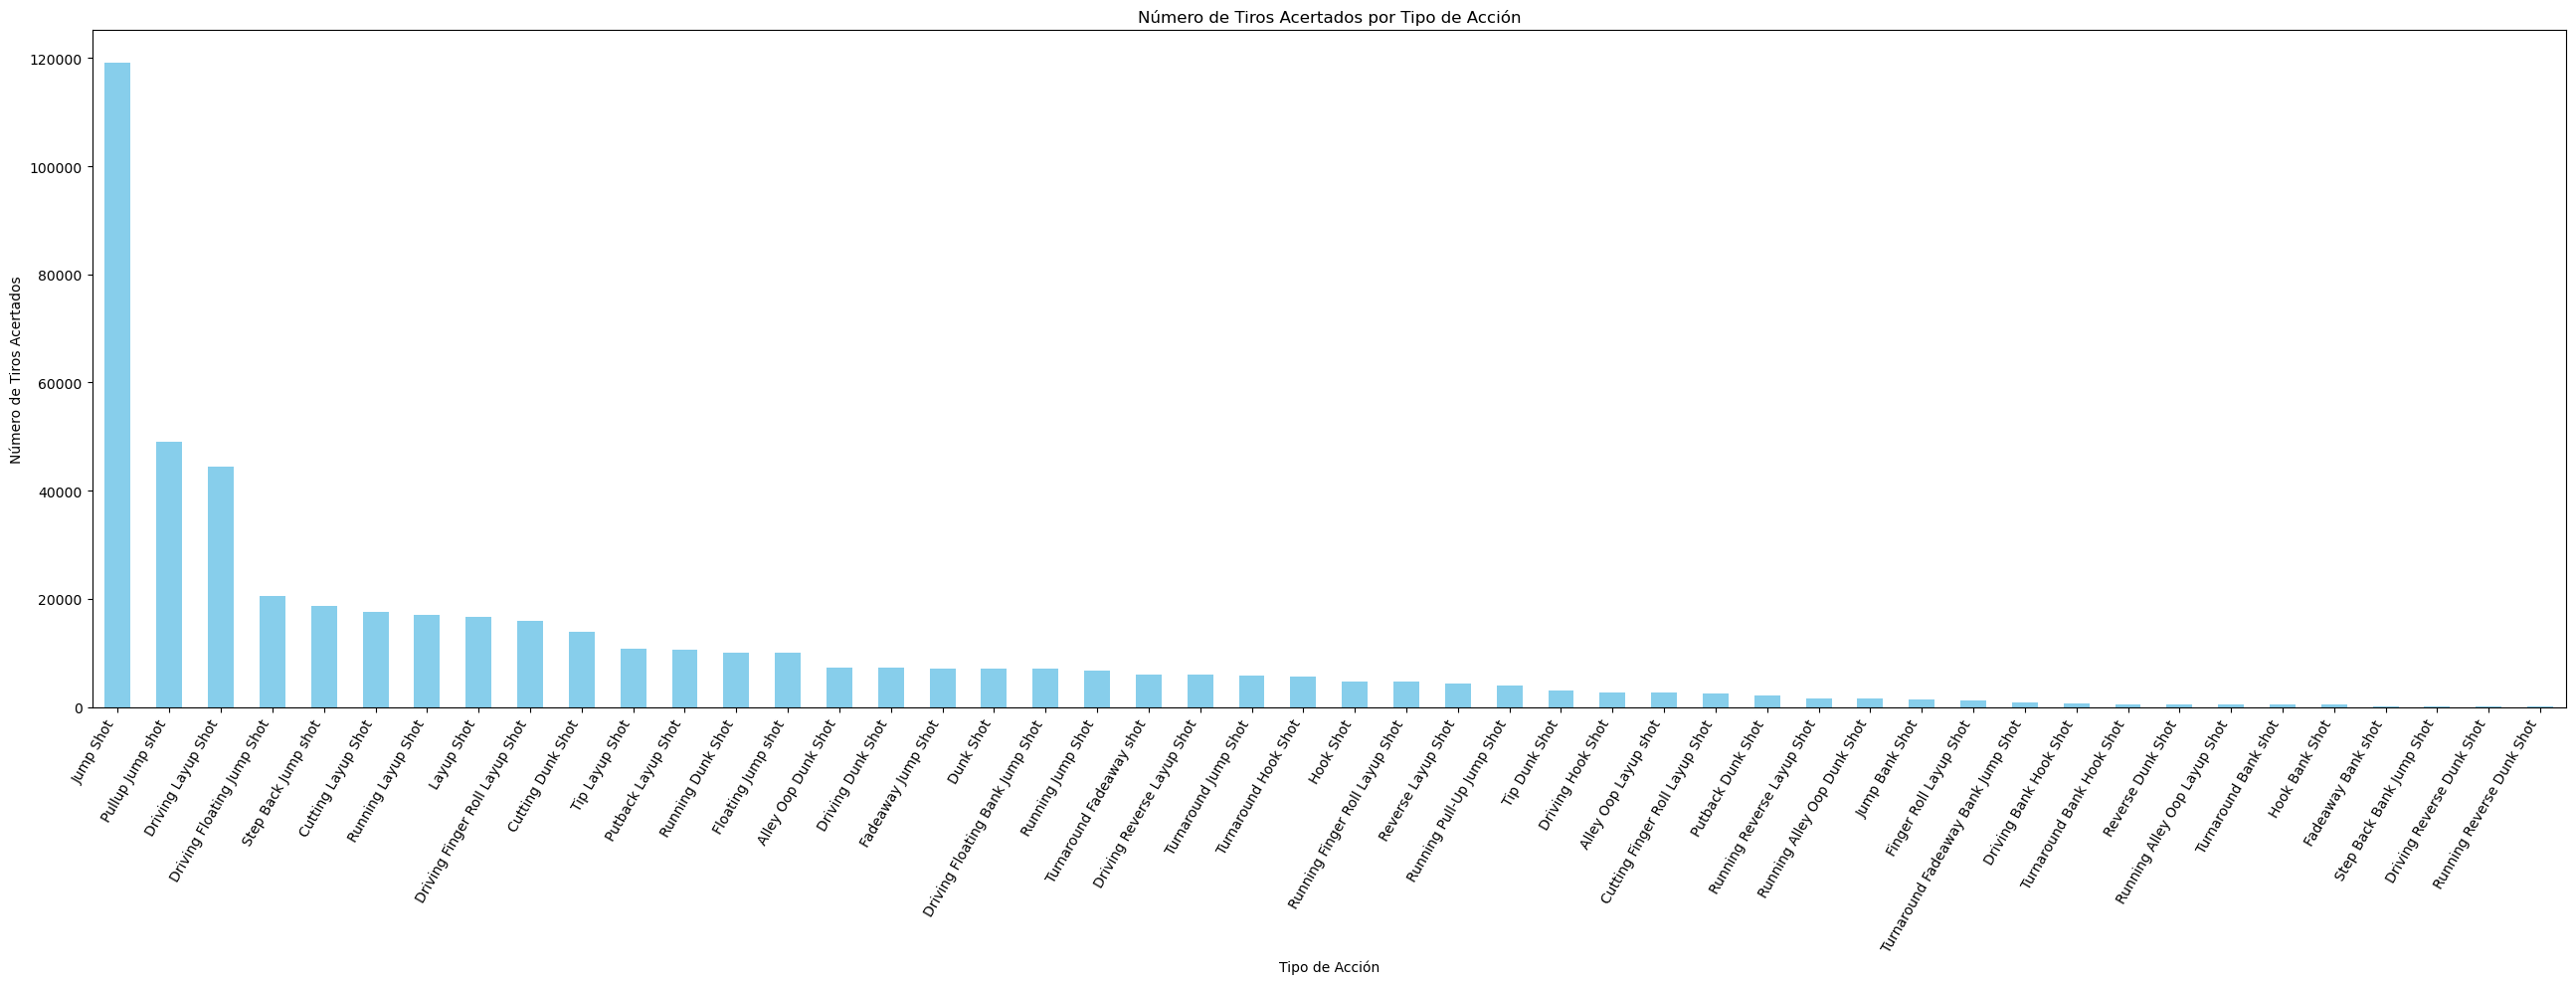

In [ ]:
aciertos_por_tiro = df.groupby('ACTION_TYPE')['SHOT_MADE'].sum()

aciertos_por_tiro = aciertos_por_tiro.sort_values(ascending=False)

plt.figure(figsize=(26, 10))  # Ajusta el tamaño de la gráfica (ancho, alto)
aciertos_por_tiro.plot(kind='bar', color='skyblue')

plt.title('Número de Tiros Acertados por Tipo de Acción')
plt.xlabel('Tipo de Acción')
plt.ylabel('Número de Tiros Acertados')

plt.xticks(rotation=60, ha='right')  # Rota las etiquetas para que se vean mejor
plt.tight_layout()  # Ajusta el espaciado
plt.show()

